## IMPORTS

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [600, 600, 3]

train_path = "/content/drive/MyDrive/FACEREC/Images/Train"
valid_path = '/content/drive/MyDrive/FACEREC/Images/Test'

## PRE TRAINED MODEL

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [4]:
for layer in vgg.layers:
  layer.trainable=False

In [5]:
folders = glob('/content/drive/MyDrive/FACEREC/Images/Train/*')
len(folders)

5

In [6]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)


In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 600, 600, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 600, 600, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 600, 600, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 300, 300, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 300, 300, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 300, 300, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 150, 150, 128)     0     

## Model Compilation

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

## Image Data Generator

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen= ImageDataGenerator(rescale=1/255)

In [10]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (600, 600),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')
testing_set = train_datagen.flow_from_directory(valid_path,
                                                target_size = (600, 600),
                                                 batch_size = 4,
                                                 class_mode = 'categorical')

Found 772 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


## Model Fit

In [11]:
history = model.fit(
  training_set,
  validation_data=testing_set,
  epochs=20,
)

Epoch 1/20
193/193 [==============================] - 665s 3s/step - loss: 2.8874 - accuracy: 0.7163 - val_loss: 1.3444 - val_accuracy: 0.8080
Epoch 2/20
193/193 [==============================] - 162s 837ms/step - loss: 0.8786 - accuracy: 0.8769 - val_loss: 1.3921 - val_accuracy: 0.7800
Epoch 3/20
193/193 [==============================] - 161s 836ms/step - loss: 0.4821 - accuracy: 0.9301 - val_loss: 2.0635 - val_accuracy: 0.7840
Epoch 4/20
193/193 [==============================] - 161s 835ms/step - loss: 1.0230 - accuracy: 0.9054 - val_loss: 3.8218 - val_accuracy: 0.7120
Epoch 5/20
193/193 [==============================] - 161s 834ms/step - loss: 0.3257 - accuracy: 0.9573 - val_loss: 1.7484 - val_accuracy: 0.8600
Epoch 6/20
193/193 [==============================] - 161s 836ms/step - loss: 0.5036 - accuracy: 0.9430 - val_loss: 1.7552 - val_accuracy: 0.8640
Epoch 7/20
193/193 [==============================] - 162s 837ms/step - loss: 0.2922 - accuracy: 0.9598 - val_loss: 5.6039 - va

## Model Evaluation

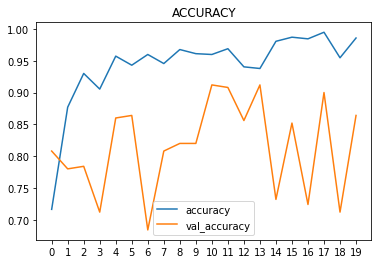

In [15]:
import matplotlib.pyplot as plt

acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(len(acc))
plt.xticks(range(0,20))
plt.plot(epochs,acc,label="accuracy")
plt.plot(epochs,val_acc,label="val_accuracy")
plt.title("ACCURACY")
plt.legend();

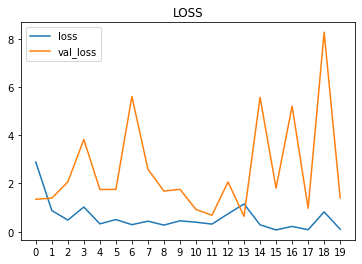

In [16]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(len(acc))
plt.xticks(range(0,20))
plt.plot(epochs,loss,label="loss")
plt.plot(epochs,val_loss,label="val_loss")
plt.title("LOSS")
plt.legend();

In [17]:
from keras.models import load_model

model.save('/content/drive/MyDrive/FACEREC/model.h5')